# Visualizing the embeddings of images in TensorBoard Projector

### References
- https://medium.com/@kumon/visualizing-image-feature-vectors-through-tensorboard-b850ce1be7f1
- https://medium.com/analytics-vidhya/tensorboard-embedding-projector-visualizing-high-dimensional-vectors-with-t-sne-or-pca-d616e222247a

In [1]:
# import cell
from forensic_lib.forensicsEvidences.imgEv.CNN import  load_default_image_model_or_preprocess, get_image_embedding
from forensic_lib.utils.img_utils import load_image
import torch
from torchvision import transforms
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np
import csv
import pandas as pd
# transform image to torch with some transorformations
preprocess = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
])

### Read dataset

In [2]:
from glob import glob
dataset = glob('data/NationalMuseum/*/*')
dataset.sort()

### Generate Embeddings

In [3]:
image_ids = [_id for _id in range(len(dataset))]
model, m_transform = load_default_image_model_or_preprocess()
embeddings, embeddings_ids  = get_image_embedding(dataset, image_ids, model, m_transform)

100%|████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.45it/s]


### Dump Features to File

In [4]:

with open('feature_vecs.tsv', 'w') as fw:
    csv_writer = csv.writer(fw, delimiter='\t')
    for embd in embeddings:
        csv_writer.writerow(embd)

### Create Sprite Image

In [13]:
np.ceil(np.sqrt(5)).astype(int)

3

In [9]:
tensor_dataset = torch.Tensor()
sprite = []
for img in dataset:
    sprite.append(preprocess(load_image(img)))
# Sprite to Pil
sprite = F.to_pil_image(make_grid(sprite, 
              nrow=np.ceil(np.sqrt(len(dataset))).astype(int),
              padding=0)
)
sprite.save("sprite.jpg")

### Create Metadata

In [6]:
df = pd.DataFrame(columns=['Relevant'])
index = 0
for img in dataset:
    df.loc[index,'Relevant'] = 'Pos' if '/Pos/' in img else 'Neg'
    df.loc[index,'Src'] = img 
    df.loc[index,'Index'] = index
    index+=1
df.to_csv('metadata.tsv', sep='\t')    

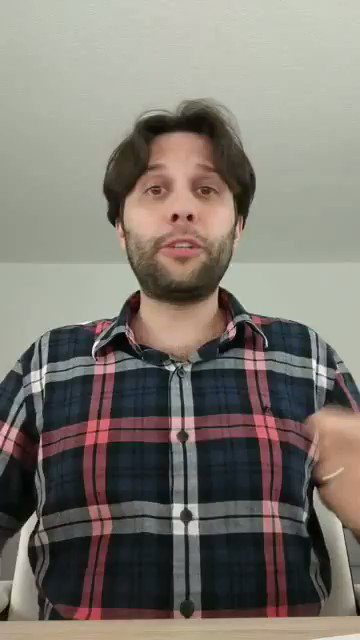

In [7]:
from PIL import Image
Image.open(df.iloc[10]['Src'])